
## Step 1: Imports and Data Loading
# In this step, we import the necessary libraries and load the dataset.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the window size
window_size = 5

# Load dataset
data = pd.read_csv('data.csv', parse_dates=['Date'], index_col='Date')

# Convert 'Page.Loads' from string to integer
data['Page.Loads'] = data['Page.Loads'].str.replace(',', '').astype(int)

# Drop unnecessary columns
columns_to_drop = ["Row", "Day", "Day.Of.Week", "Unique.Visits", "Returning.Visits", "First.Time.Visits"]
data.drop(columns=columns_to_drop, inplace=True)


## Step 2: Data Normalization and Sequence Creation
# Here, we normalize the data and define functions to create sequences for the LSTM model.


In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Function to create sequences
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        sequence = data[i:(i + window_size)]
        label = data[i + window_size]
        X.append(sequence)
        y.append(label)
    return np.array(X), np.array(y)

# Function to prepare data
def prepare_data(data, start_date, end_date, window_size, scaler):
    data_filtered = data.loc[start_date:end_date, 'Page.Loads'].values.reshape(-1, 1)
    data_normalized = scaler.transform(data_filtered)
    X, y = create_sequences(data_normalized, window_size)
    X = X.reshape((X.shape[0], window_size, 1))
    return X, y

## Step 3: Model Definition
# We define the LSTM model architecture.

In [37]:
# Function to create the model
def create_model(window_size):
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(window_size, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


## Step 4: Prediction and Plotting
# This part contains the function to plot the predictions and actual values, providing a visual comparison.


In [38]:
def plot_predictions(test, y_test, predicted_test, start_date, end_date, window_size, date_time):
    test_dates = test[start_date:end_date].index  # Adjusting the test_dates to match y_test and predicted_test
    uncertainty = 0.10 * predicted_test.flatten()
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.scatter(test_dates, y_test, color='red', label='Actual')
    ax.plot(test_dates, predicted_test, color='blue', label='Predicted')
    ax.fill_between(test_dates, 
                    (predicted_test.flatten() - uncertainty), 
                    (predicted_test.flatten() + uncertainty), 
                    color='blue', alpha=0.2)
    ax.set_title( 'LSTM Page Load Time Prediction with ' + date_time + ' of training data')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Loads')
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.set_xlim([pd.Timestamp(start_date) - pd.DateOffset(days=5), pd.Timestamp(end_date) + pd.DateOffset(days=5)])
    ax.set_ylim([0, max(max(y_test), max(predicted_test)) + 1000])
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()

## Step 5: Training and Evaluation Loop
# In this final step, we train the model using different training periods and evaluate its performance.


In [39]:
# Prepare training data for 2019
start_date = '2019-01-01'
end_date = '2019-12-26'

# Define testing period
testing_start_date = '2019-12-27'
testing_end_date = '2020-01-31'


scaler.fit(data.loc[start_date:end_date, ['Page.Loads']])
X_train, y_train = prepare_data(data, start_date, end_date, window_size, scaler)


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


# Train the model for 2019 data

In [40]:
%%time
model = create_model(window_size)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3506   
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2456 
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1704 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0932 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0514 
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0560 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0478 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0446 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.0475
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0495 
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0460 
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0444 
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0443 
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0399 
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0450 
Epoch 16/50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


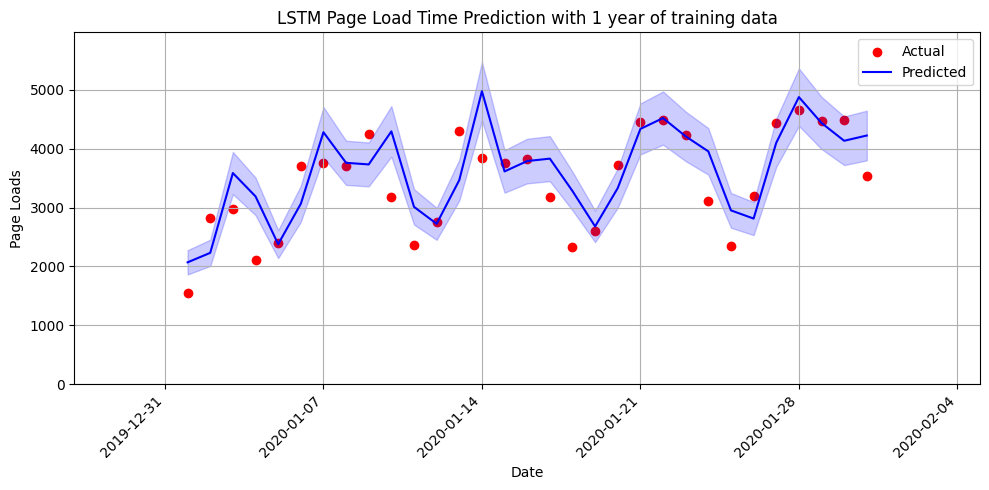

In [41]:
# Prepare testing data
X_test, y_test = prepare_data(data, testing_start_date, testing_end_date, window_size, scaler)

# Predict on test data
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)

# Correctly get the actual values for the test period
y_test_actual = data.loc['2020-01-01':'2020-01-31', 'Page.Loads']
date_time = '1 year'
# Ensure 1-dimensional arrays for metric calculation
y_test_actual = y_test_actual.to_numpy().flatten()
predicted_test = predicted_test.flatten()[:len(y_test_actual)]  # Ensure the prediction length matches the actual data length

# Calculate metrics
mse = mean_squared_error(y_test_actual, predicted_test)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_actual, predicted_test)
mape = np.mean(np.abs((y_test_actual - predicted_test) / y_test_actual)) * 100

# Store results
results_2019 = (start_date, end_date, rmse, mae, mape)

# Plot predictions
plot_predictions(data, y_test_actual, predicted_test, '2020-01-01', '2020-01-31', window_size, date_time)

## Step 6: Training and Evaluation for 2018 Data
# We train the model using data from 2018 and measure the training time.


In [42]:
# Prepare training data for 2018
start_date = '2018-01-01'
end_date = '2019-12-26'
scaler.fit(data.loc[start_date:end_date, ['Page.Loads']])
X_train, y_train = prepare_data(data, start_date, end_date, window_size, scaler)

c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [43]:
%%time
# Train the model for 2018 data
model = create_model(window_size)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1984   
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0774 
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0386 
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0371 
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0357 
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0331 
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0343 
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0330 
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0327 
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0296 
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0281 
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0257 
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0228 
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0211 
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0197 
Epoch 16/50
2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


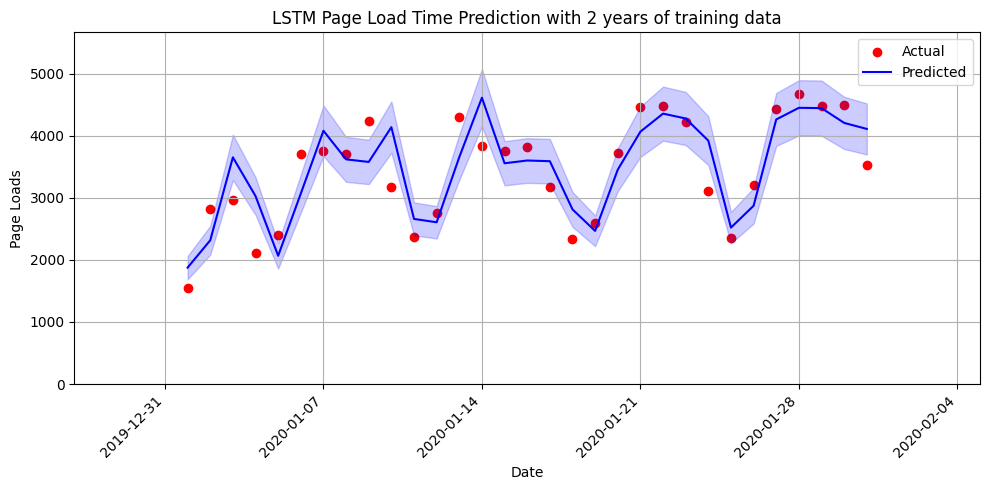

In [44]:
# Prepare testing data
X_test, y_test = prepare_data(data, testing_start_date, testing_end_date, window_size, scaler)

# Predict on test data
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)

# Correctly get the actual values for the test period
y_test_actual = data.loc['2020-01-01':'2020-01-31', 'Page.Loads']
date_time = '2 years'
# Ensure 1-dimensional arrays for metric calculation
y_test_actual = y_test_actual.to_numpy().flatten()
predicted_test = predicted_test.flatten()[:len(y_test_actual)]  # Ensure the prediction length matches the actual data length

# Calculate metrics
mse = mean_squared_error(y_test_actual, predicted_test)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_actual, predicted_test)
mape = np.mean(np.abs((y_test_actual - predicted_test) / y_test_actual)) * 100

# Store results
results_2018 = (start_date, end_date, rmse, mae, mape)

# Plot predictions
plot_predictions(data, y_test_actual, predicted_test, '2020-01-01', '2020-01-31', window_size, date_time)

## Step 7: Training and Evaluation for 2017 Data
# We train the model using data from 2017 and measure the training time.


In [45]:
# Prepare training data for 2017
start_date = '2017-01-01'
end_date = '2019-12-26'
scaler.fit(data.loc[start_date:end_date, ['Page.Loads']])
X_train, y_train = prepare_data(data, start_date, end_date, window_size, scaler)

c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [46]:
%%time
# Train the model for 2017 data
model = create_model(window_size)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1524   
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0358 
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0312 
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0319
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0278 
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0282 
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0248 
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0227 
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0190 
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0157 
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133 
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0117 
Epoch 13/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109 
Epoch 14/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0115 
Epoch 15/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0099 
Epoch 16/50
34

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


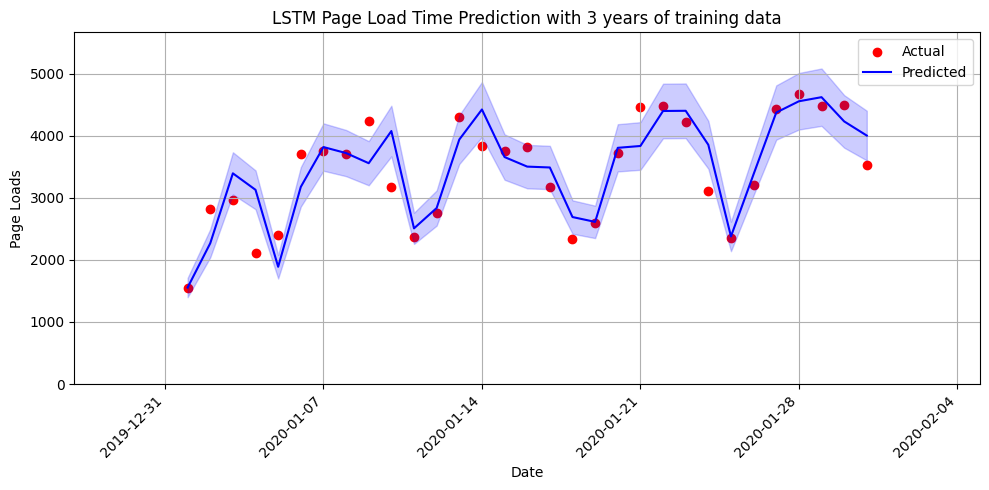

In [47]:
# Prepare testing data
X_test, y_test = prepare_data(data, testing_start_date, testing_end_date, window_size, scaler)

# Predict on test data
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)

# Correctly get the actual values for the test period
y_test_actual = data.loc['2020-01-01':'2020-01-31', 'Page.Loads']
date_time = '3 years'
# Ensure 1-dimensional arrays for metric calculation
y_test_actual = y_test_actual.to_numpy().flatten()
predicted_test = predicted_test.flatten()[:len(y_test_actual)]  # Ensure the prediction length matches the actual data length

# Calculate metrics
mse = mean_squared_error(y_test_actual, predicted_test)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_actual, predicted_test)
mape = np.mean(np.abs((y_test_actual - predicted_test) / y_test_actual)) * 100

# Store results
results_2017 = (start_date, end_date, rmse, mae, mape)

# Plot predictions
plot_predictions(data, y_test_actual, predicted_test, '2020-01-01', '2020-01-31', window_size, date_time)

## Step 8: Training and Evaluation for 2016 Data
# We train the model using data from 2016 and measure the training time.


In [48]:
# Prepare training data for 2016
start_date = '2016-01-01'
end_date = '2019-12-26'
scaler.fit(data.loc[start_date:end_date, ['Page.Loads']])
X_train, y_train = prepare_data(data, start_date, end_date, window_size, scaler)


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [49]:
%%time
# Train the model for 2016 data
model = create_model(window_size)
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1233
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0331
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0289
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0271 
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0222
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0180 
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0138 
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0119
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0111
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0112 
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0109
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0093
Epoch 13/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0089
Epoch 14/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0084
Epoch 15/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0078
Epoch 16/50
46/46 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


c:\Users\Zebbe\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


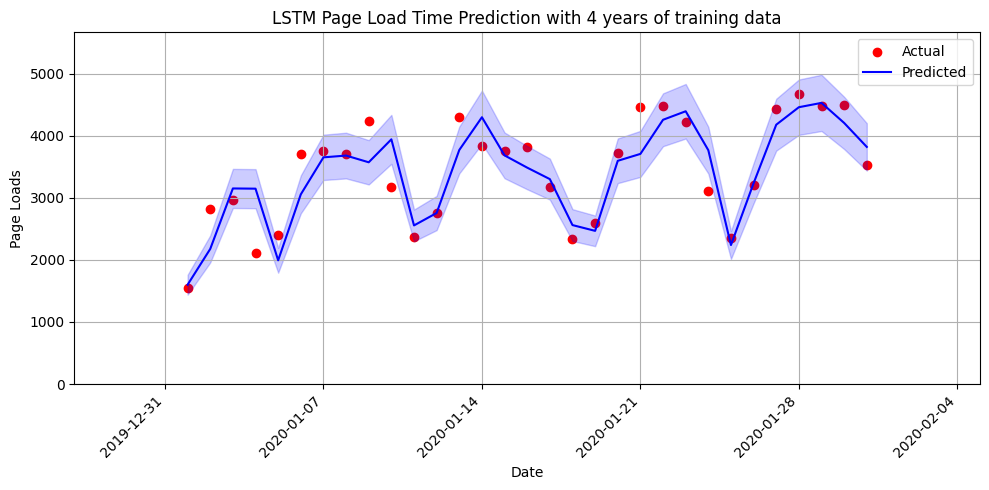

In [50]:
# Prepare testing data
X_test, y_test = prepare_data(data, testing_start_date, testing_end_date, window_size, scaler)

# Predict on test data
predicted_test = model.predict(X_test)
predicted_test = scaler.inverse_transform(predicted_test)

# Correctly get the actual values for the test period
y_test_actual = data.loc['2020-01-01':'2020-01-31', 'Page.Loads']
date_time = '4 years'
# Ensure 1-dimensional arrays for metric calculation
y_test_actual = y_test_actual.to_numpy().flatten()
predicted_test = predicted_test.flatten()[:len(y_test_actual)]  # Ensure the prediction length matches the actual data length

# Calculate metrics
mse = mean_squared_error(y_test_actual, predicted_test)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test_actual, predicted_test)
mape = np.mean(np.abs((y_test_actual - predicted_test) / y_test_actual)) * 100

# Store results
results_2016 = (start_date, end_date, rmse, mae, mape)

# Plot predictions
plot_predictions(data, y_test_actual, predicted_test, '2020-01-01', '2020-01-31', window_size, date_time)

## Step 9: Display Results
# Finally, we display the results for all training periods.

In [51]:
# Print results
for result in [results_2016, results_2017, results_2018, results_2019]:
    print(f"Training period: {result[0]} to {result[1]}")
    print(f"  RMSE: {result[2]}")
    print(f"  MAE: {result[3]}")
    print(f"  MAPE: {result[4]}")
    print("\n" + "-"*50 + "\n")

Training period: 2016-01-01 to 2019-12-26
  RMSE: 411.6937783623864
  MAE: 314.6030509702621
  MAPE: 9.756275149501862

--------------------------------------------------

Training period: 2017-01-01 to 2019-12-26
  RMSE: 421.7174680120433
  MAE: 320.02134261592744
  MAPE: 10.06679144432906

--------------------------------------------------

Training period: 2018-01-01 to 2019-12-26
  RMSE: 468.40639581935994
  MAE: 391.461662046371
  MAPE: 12.591733434858753

--------------------------------------------------

Training period: 2019-01-01 to 2019-12-26
  RMSE: 575.1390835908051
  MAE: 457.6971396169355
  MAPE: 15.239820008267694

--------------------------------------------------

